In [14]:
## SEMANTIC ##

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [122]:
data = pd.read_csv('digit-recognizer/train.csv')

In [123]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [36]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
        

In [55]:
def get_predictions(A2):
    return np.argmax(A2,0)


def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [61]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train, 0.1, 2000)

Iteration:  0
[0 6 0 ... 6 6 6] [6 4 9 ... 4 3 3]
0.1384878048780488
Iteration:  100
[0 4 9 ... 4 8 1] [6 4 9 ... 4 3 3]
0.6223414634146341
Iteration:  200
[0 4 9 ... 4 8 1] [6 4 9 ... 4 3 3]
0.7840731707317073
Iteration:  300
[6 4 9 ... 4 3 1] [6 4 9 ... 4 3 3]
0.8259024390243902
Iteration:  400
[6 4 9 ... 4 3 1] [6 4 9 ... 4 3 3]
0.8447317073170731
Iteration:  500
[6 4 9 ... 4 3 1] [6 4 9 ... 4 3 3]
0.8568780487804878
Iteration:  600
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8653170731707317
Iteration:  700
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8713658536585366
Iteration:  800
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8765609756097561
Iteration:  900
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8811219512195122
Iteration:  1000
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8849756097560976
Iteration:  1100
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8884146341463415
Iteration:  1200
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.8913170731707317
Iteration:  1300
[6 4 9 ... 4 3 2] [6 4 9 ... 4 3 3]
0.894219512195122
Itera

In [93]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_, A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image = X_train[:,index,None]
    prediction = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print("Predizione: ", prediction)
    print("Label : ",label)
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()
    
    
def find_problems(W1,b1,W2,b2):
    result = 0
    for i in range(41000):
        current_image = X_train[:,i,None]
        prediction = make_predictions(X_train[:,i,None],W1,b1,W2,b2)
        label = Y_train[i]
        if (prediction != label):
            result+=1
    
    return result
    

Predizione:  [4]
Label :  4


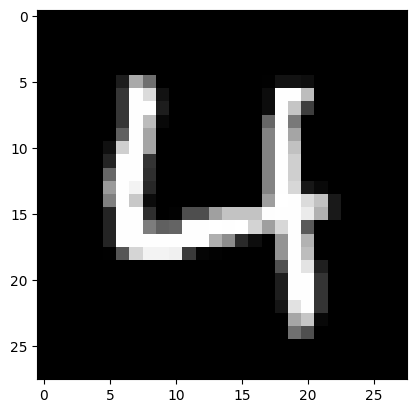

In [124]:
test_prediction(380, W1,b1,W2,b2)

In [125]:
find_problems(W1,b1,W2,b2)

3799

In [132]:
def optimized_train(X, Y, alpha):
    
    iterations = 0
    finded = False
    
    while not finded:
        W1, b1, W2, b2 = init_params()
        for i in range(iterations):
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        issues = find_problems(W1,b1,W2,b2)
        
        if issues <= 34000:
            finded = True
        
        if finded:
            print("Modello Trovato con : ",issues)

    return W1, b1, W2, b2

In [133]:
optimized_train(X_train,Y_train, 0.1)

Modello Trovato con :  33398


(array([[ 7.89503308e-02,  6.67474648e-02,  2.47159103e-01, ...,
          1.03162027e-01, -2.32412661e-01, -1.36233253e-03],
        [-4.61973420e-01, -4.47501082e-01,  1.61602454e-01, ...,
          1.76630196e-01, -4.99560971e-01,  1.99315685e-01],
        [-4.02254226e-02,  1.19715311e-01, -2.11514307e-01, ...,
          1.64143152e-01, -2.87980376e-02, -3.62324706e-01],
        ...,
        [ 4.40963206e-01, -2.29504328e-01,  5.14926055e-02, ...,
         -3.56187908e-01, -5.96528254e-02,  3.25376222e-01],
        [ 9.64514592e-02, -2.17340899e-02, -4.61657819e-01, ...,
         -2.96218920e-01,  2.76694137e-01,  1.19500454e-01],
        [-2.47080190e-04, -3.25675758e-01, -3.04021506e-01, ...,
          2.35029576e-02,  1.97227786e-01,  2.12693715e-01]]),
 array([[-0.38757286],
        [-0.07171531],
        [-0.49980388],
        [ 0.03763111],
        [ 0.16623242],
        [-0.43620748],
        [ 0.01159802],
        [ 0.04646953],
        [-0.31208606],
        [-0.23970111]]

Predizione:  [6]
Label :  6


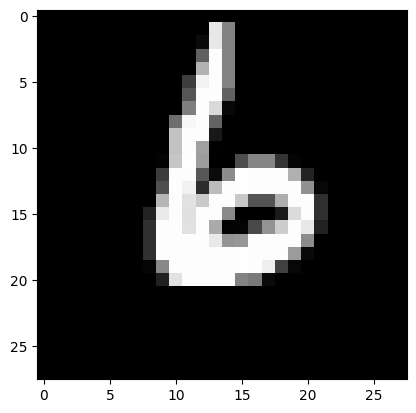

In [114]:
test_prediction(2000, W1,b1,W2,b2)